In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import requests

**Price Data**

API call

In [126]:
base_url = "https://api.abastores.com/api/v2/marketdata/dataprice-rag/"

# Inicializar una lista para almacenar los datos de todas las páginas
all_data = []

# Iterar sobre las 36 páginas
for page_number in range(1, 38):
    # Construir el URL completo para la página actual
    url = f"{base_url}?page={page_number}&page_size=1000"
    
    # Enviar una solicitud GET al endpoint
    response = requests.get(url)
    
    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener los datos de la respuesta
        data = response.json()
        
        # Extraer valores de la columna "results" y crear columnas separadas
        df = pd.json_normalize(data['results'])
        
        # Agregar el DataFrame actual a la lista
        all_data.append(df)
    else:
        print(f"Failed to retrieve data for page {page_number}. Status code:", response.status_code)

# Concatenar todos los DataFrames en un solo DataFrame
final_df_1 = pd.concat(all_data, ignore_index=True)

/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/1258450121.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df_1 = pd.concat(all_data, ignore_index=True)


In [141]:
final_df=final_df_1.copy()

**Provinces Available**

In [142]:
final_df['province.name'].value_counts()

province.name
Toledo            21673
Sevilla            3910
Albacete           2297
León               2196
Barcelona           830
Palencia            757
Ciudad Real         626
Zaragoza            572
Lleida              572
París               537
Salamanca           522
Segovia             396
Valladolid          381
Cuenca              378
Burgos              378
Córdoba             295
Zamora              293
Estados Unidos       64
Internacional         8
Murcia                1
Navarra               1
Cáceres               1
Huelva                1
Name: count, dtype: int64

In [143]:
zaragoza_prices = final_df[final_df['province.name']=='Zaragoza']

In [144]:
zaragoza_prices.head(3)

,id,date,price,quantity,region,product.id,product.meta_product.id,product.meta_product.name,product.meta_product.icon,product.family.id,product.family.name,product.variety.id,product.variety.name,data_source.id,data_source.name,data_source.link,data_source.kind,province.id,province.name
4,181460,2024-05-20T18:00:00+02:00,212.0,NaN,NaN,1,284,Trigo,a-wheat,1,Cereales,15557,Blando,31,Abastores,https://www.abastores.com/,ABASTORES,56,Zaragoza
35,181417,2024-05-17T14:00:00+02:00,207.0,NaN,NaN,1,284,Trigo,a-wheat,1,Cereales,15557,Blando,31,Abastores,https://www.abastores.com/,ABASTORES,56,Zaragoza
39,181421,2024-05-17T14:00:00+02:00,200.0,NaN,NaN,20461,5,Cebada,a-barley,1,Cereales,1,Común,31,Abastores,https://www.abastores.com/,ABASTORES,56,Zaragoza


**Products Available**

In [145]:
zaragoza_prices['product.meta_product.name'].value_counts()

product.meta_product.name
Trigo     287
Cebada    285
Name: count, dtype: int64

We are going to choose "Trigo" for the first part of our investigation

In [146]:
zaragoza_price_trigo = zaragoza_prices[zaragoza_prices['product.meta_product.name']=='Trigo']

In [147]:
zaragoza_price_trigo['data_source.kind'].value_counts()

data_source.kind
ABASTORES    287
Name: count, dtype: int64

We have an only source, so we are going to leave the data like this

In [148]:
print(min(zaragoza_price_trigo['date']),max(zaragoza_price_trigo['date']))

2023-03-13T16:50:00+01:00 2024-05-20T18:00:00+02:00


In [149]:
zaragoza_price_trigo['date'] = pd.to_datetime(zaragoza_price_trigo['date'],utc=True)

/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/2311224222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zaragoza_price_trigo['date'] = pd.to_datetime(zaragoza_price_trigo['date'],utc=True)


In [150]:
zaragoza_price_trigo['formatted_date'] = zaragoza_price_trigo['date'].dt.strftime('%Y-%m-%d 00:00:00%z')


/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/3782874725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zaragoza_price_trigo['formatted_date'] = zaragoza_price_trigo['date'].dt.strftime('%Y-%m-%d 00:00:00%z')


In [151]:
zaragoza_price_trigo_filt = zaragoza_price_trigo[['formatted_date','price']]

In [152]:
zaragoza_price_trigo_filt.value_counts()

formatted_date            price 
2023-03-13 00:00:00+0000  290.50    1
2023-12-19 00:00:00+0000  221.50    1
2024-01-08 00:00:00+0000  223.50    1
2023-12-28 00:00:00+0000  224.50    1
2023-12-27 00:00:00+0000  224.50    1
                                   ..
2023-07-28 00:00:00+0000  248.00    1
2023-07-27 00:00:00+0000  248.50    1
2023-07-26 00:00:00+0000  249.00    1
2023-07-25 00:00:00+0000  249.75    1
2024-05-20 00:00:00+0000  212.00    1
Name: count, Length: 287, dtype: int64

In [153]:
zaragoza_price_trigo_filt

,formatted_date,price
4,2024-05-20 00:00:00+0000,212.00
35,2024-05-17 00:00:00+0000,207.00
55,2024-05-16 00:00:00+0000,207.00
88,2024-05-15 00:00:00+0000,208.00
110,2024-05-14 00:00:00+0000,208.00
...,...,...
7405,2023-03-17 00:00:00+0000,281.50
7439,2023-03-16 00:00:00+0000,283.00
7458,2023-03-15 00:00:00+0000,283.75
7482,2023-03-14 00:00:00+0000,285.00


In [154]:
# Convert 'formatted_date' to datetime
zaragoza_price_trigo_filt['formatted_date'] = pd.to_datetime(zaragoza_price_trigo_filt['formatted_date'])

/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/1910718606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zaragoza_price_trigo_filt['formatted_date'] = pd.to_datetime(zaragoza_price_trigo_filt['formatted_date'])


**Plotting "Trigo" price**

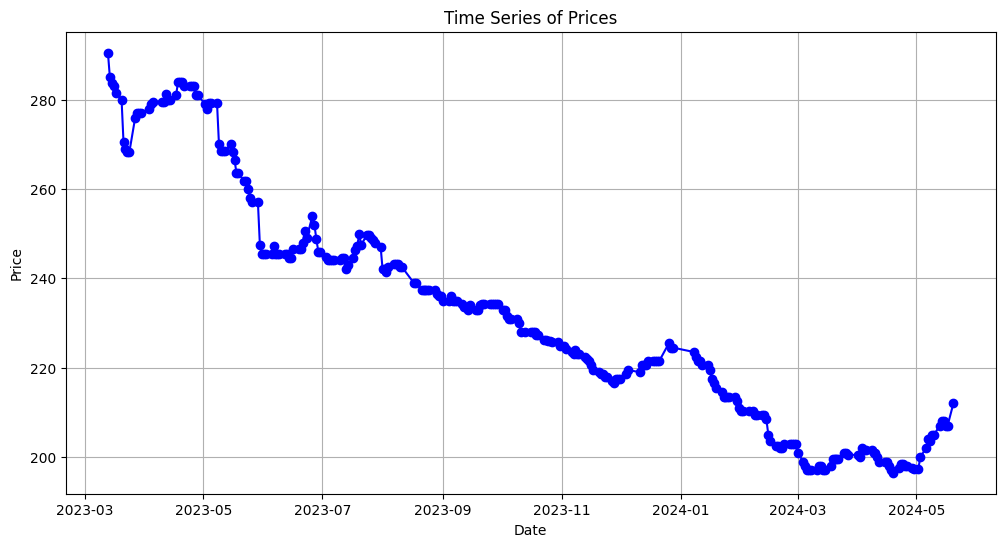

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(zaragoza_price_trigo_filt['formatted_date'], zaragoza_price_trigo_filt['price'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Resampling data from Abastores Data Source**

In [158]:
# Set 'formatted_date' as index
zaragoza_price_trigo_filt.set_index('formatted_date', inplace=True)

# Resample the data to have one sample per day, filling missing days with the previous value
zaragoza_price_trigo_resampled = zaragoza_price_trigo_filt.resample('D').interpolate(method='linear')

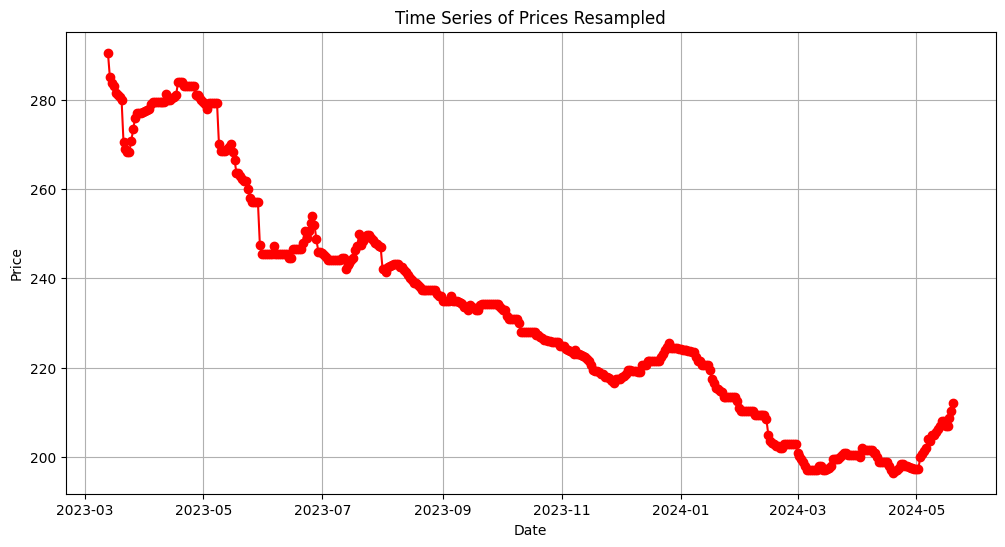

In [159]:
plt.figure(figsize=(12, 6))
plt.plot(zaragoza_price_trigo_resampled.index, zaragoza_price_trigo_resampled['price'], marker='o', linestyle='-', color='r')
plt.title('Time Series of Prices Resampled')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Resampled the information for each day

In [215]:
# Si 'formatted_date' es el índice
zaragoza_price_trigo_resampled['date_only'] = zaragoza_price_trigo_resampled.index.date

zaragoza_price_trigo_resampled=zaragoza_price_trigo_resampled[['date_only','price']]

---

**Weather Data**

Read csv File

In [175]:
df_w = pd.read_csv('daily_weather_monthly_dummies.csv')

**The coordinates latitude=41.78681 and longitude= −0.123294
point to a location in Spain. Specifically, this location is near the city of Zaragoza in the autonomous community of Aragon. Zaragoza is situated in the northeastern part of Spain and is known for its rich history and cultural landmarks, including the Basilica of Our Lady of the Pillar and the Aljafería Palace.**

**Exploration data analysis**

In [176]:
df_w.shape

(5113, 51)

- 5113 samples with 51 columns

In [177]:
df_w.dtypes

dt_iso                                       object
dt                                          float64
timezone                                    float64
lat                                         float64
lon                                         float64
temp                                        float64
visibility                                  float64
dew_point                                   float64
feels_like                                  float64
temp_min                                    float64
temp_max                                    float64
pressure                                    float64
sea_level                                   float64
grnd_level                                  float64
humidity                                    float64
wind_speed                                  float64
wind_deg                                    float64
wind_gust                                   float64
rain_1h                                     float64
rain_3h     

- All are numerical columns

In [179]:
df_w.head()

,dt_iso,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,weather_icon_02d,weather_icon_02n,weather_icon_03d,weather_icon_03n,weather_icon_04d,weather_icon_04n,weather_icon_10d,weather_icon_10n,weather_icon_13d,weather_icon_13n
0,2010-01-01 00:00:00+00:00,1.262345e+09,3600.0,41.78681,-0.123294,7.591667,NaN,0.423333,4.404583,6.681250,...,0.000000,0.125000,0.166667,0.166667,0.166667,0.041667,0.000000,0.000000,0.0,0.0
1,2010-01-02 00:00:00+00:00,1.262432e+09,3600.0,41.78681,-0.123294,5.936250,NaN,1.635000,3.308750,5.188750,...,0.083333,0.083333,0.041667,0.208333,0.083333,0.208333,0.000000,0.000000,0.0,0.0
2,2010-01-03 00:00:00+00:00,1.262518e+09,3600.0,41.78681,-0.123294,5.539167,NaN,3.432500,4.485417,5.045417,...,0.000000,0.083333,0.000000,0.041667,0.250000,0.333333,0.125000,0.083333,0.0,0.0
3,2010-01-04 00:00:00+00:00,1.262605e+09,3600.0,41.78681,-0.123294,6.588333,NaN,4.985833,5.347500,5.953750,...,0.000000,0.000000,0.000000,0.000000,0.375000,0.416667,0.000000,0.208333,0.0,0.0
4,2010-01-05 00:00:00+00:00,1.262691e+09,3600.0,41.78681,-0.123294,7.656250,NaN,4.506250,6.057500,7.168750,...,0.000000,0.000000,0.000000,0.000000,0.291667,0.291667,0.083333,0.333333,0.0,0.0


In [182]:
empty = pd.DataFrame(df_w.isnull().sum()).sort_values(0,ascending=True)
empty.columns = ['vacios']
empty['vacios%'] = round(empty['vacios']/df_w.shape[0], 2)*100
empty.sort_values('vacios',ascending=False).head(10)

,vacios,vacios%
sea_level,5113,100.0
snow_3h,5113,100.0
visibility,5113,100.0
grnd_level,5113,100.0
rain_3h,5108,100.0
snow_1h,5097,100.0
wind_gust,5075,99.0
rain_1h,3552,69.0
temp_max,0,0.0
timezone,0,0.0


**Exploring the columns with most of missing values**

Having sea_level,snow_3h,visibility,grnd_level,rain_3h,snow_1g,wind_gust with almost 100% of missing values means that they are not representative for our analaysis.

**Dropping columns**

In [190]:
df_w.drop(columns=['sea_level','snow_3h','visibility','grnd_level','rain_3h','snow_1h','wind_gust'],inplace=True)

**Exploring unique values per column**

In [198]:
df_w.head(3)

,dt_iso,dt,timezone,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,...,weather_icon_02d,weather_icon_02n,weather_icon_03d,weather_icon_03n,weather_icon_04d,weather_icon_04n,weather_icon_10d,weather_icon_10n,weather_icon_13d,weather_icon_13n
0,2010-01-01 00:00:00+00:00,1.262345e+09,3600.0,41.78681,-0.123294,7.591667,0.423333,4.404583,6.681250,8.210417,...,0.000000,0.125000,0.166667,0.166667,0.166667,0.041667,0.000,0.000000,0.0,0.0
1,2010-01-02 00:00:00+00:00,1.262432e+09,3600.0,41.78681,-0.123294,5.936250,1.635000,3.308750,5.188750,6.635833,...,0.083333,0.083333,0.041667,0.208333,0.083333,0.208333,0.000,0.000000,0.0,0.0
2,2010-01-03 00:00:00+00:00,1.262518e+09,3600.0,41.78681,-0.123294,5.539167,3.432500,4.485417,5.045417,6.327500,...,0.000000,0.083333,0.000000,0.041667,0.250000,0.333333,0.125,0.083333,0.0,0.0


In [199]:
df_w['dt_iso'] = pd.to_datetime(df_w['dt_iso'])

# Si 'formatted_date' es el índice
df_w['date_only'] = df_w['dt_iso'].dt.date

In [200]:
df_w.nunique()

dt_iso                                      5113
dt                                          5113
timezone                                       4
lat                                            1
lon                                            1
temp                                        4908
dew_point                                   4889
feels_like                                  4934
temp_min                                    4949
temp_max                                    4930
pressure                                     842
humidity                                    1358
wind_speed                                  4129
wind_deg                                    3082
rain_1h                                      908
clouds_all                                  2044
weather_id                                   795
city_name_Custom location                      1
weather_main_Clear                            25
weather_main_Clouds                           25
weather_main_Rain   

**We drop columns that dont give us information**

In [201]:
columns_with_not_info =['dt_iso','dt','timezone','lat','lon','city_name_Custom location']

df_w.drop(columns=columns_with_not_info,inplace=True)

**rain_1h**

In [204]:
df_w['rain_1h'].value_counts(dropna=False)

rain_1h
NaN         3552
0.110000      36
0.120000      27
0.160000      23
0.130000      20
            ... 
1.505000       1
1.381250       1
1.222857       1
0.605000       1
0.987143       1
Name: count, Length: 909, dtype: int64

Completing with 0 the NaN values that represents that there was not rain

In [207]:
df_w.loc[df_w['rain_1h'].isna(),'rain_1h']=0

**Checking missing values**

In [209]:
empty = pd.DataFrame(df_w.isnull().sum()).sort_values(0,ascending=True)
empty.columns = ['vacios']
empty['vacios%'] = round(empty['vacios']/df_w.shape[0], 2)*100
empty.sort_values('vacios',ascending=False).head(10)

,vacios,vacios%
temp,0,0.0
wind_deg,0,0.0
feels_like,0,0.0
temp_min,0,0.0
temp_max,0,0.0
pressure,0,0.0
humidity,0,0.0
wind_speed,0,0.0
weather_description_heavy intensity rain,0,0.0
clouds_all,0,0.0


In [211]:
df_w_cleaned=df_w.copy()

zaragoza_price_trigo_resampled and df_w_cleaned

In [219]:
zaragoza_price_trigo_resampled

,date_only,price
formatted_date,,
2023-03-13 00:00:00+00:00,2023-03-13,290.500000
2023-03-14 00:00:00+00:00,2023-03-14,285.000000
2023-03-15 00:00:00+00:00,2023-03-15,283.750000
2023-03-16 00:00:00+00:00,2023-03-16,283.000000
2023-03-17 00:00:00+00:00,2023-03-17,281.500000
...,...,...
2024-05-16 00:00:00+00:00,2024-05-16,207.000000
2024-05-17 00:00:00+00:00,2024-05-17,207.000000
2024-05-18 00:00:00+00:00,2024-05-18,208.666667


In [222]:
zaragoza_price_trigo_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 435 entries, 2023-03-13 00:00:00+00:00 to 2024-05-20 00:00:00+00:00
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_only  435 non-null    object 
 1   price      435 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [225]:
zaragoza_price_trigo_resampled

,date_only,price
formatted_date,,
2023-03-13 00:00:00+00:00,2023-03-13,290.500000
2023-03-14 00:00:00+00:00,2023-03-14,285.000000
2023-03-15 00:00:00+00:00,2023-03-15,283.750000
2023-03-16 00:00:00+00:00,2023-03-16,283.000000
2023-03-17 00:00:00+00:00,2023-03-17,281.500000
...,...,...
2024-05-16 00:00:00+00:00,2024-05-16,207.000000
2024-05-17 00:00:00+00:00,2024-05-17,207.000000
2024-05-18 00:00:00+00:00,2024-05-18,208.666667


---

In [245]:
merged_df = pd.merge(zaragoza_price_trigo_resampled, df_w, on='date_only', how='inner')

In [246]:
merged_df.head(1)

,date_only,price,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,weather_icon_02d,weather_icon_02n,weather_icon_03d,weather_icon_03n,weather_icon_04d,weather_icon_04n,weather_icon_10d,weather_icon_10n,weather_icon_13d,weather_icon_13n
0,2023-03-13,290.5,18.331667,6.82375,17.586667,16.27125,19.424583,1012.291667,53.416667,3.847917,...,0.0,0.041667,0.041667,0.041667,0.333333,0.25,0.0,0.0,0.0,0.0


In [247]:
merged_df.set_index('date_only', inplace=True)

In [249]:
# Función para crear características retardadas
def crear_caracteristicas_retardadas(df, lags):
    for col in df.columns:
        for lag in range(1, lags + 1):
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df

# Crear características retardadas
lags = 3
df = crear_caracteristicas_retardadas(merged_df, lags)

# Eliminar filas con valores NaN debido a los lags
df.dropna(inplace=True)

# Definir características (X) y objetivo (y)
X = df.drop(columns=['price'])
y = df['price']

/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/1692007442.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/1692007442.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/var/folders/13/vtwv0p951k11cf7tvhd750jw0000gn/T/ipykernel_41692/1692007442.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [276]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo
modelo_lr = LinearRegression()

# Entrenar el modelo
modelo_lr.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (Linear Regression): {mse_lr}')
print(f'R^2 Score (Linear Regression): {r2_lr}')


Mean Squared Error (Linear Regression): 2.2382096593478455
R^2 Score (Linear Regression): 0.8513807302871783


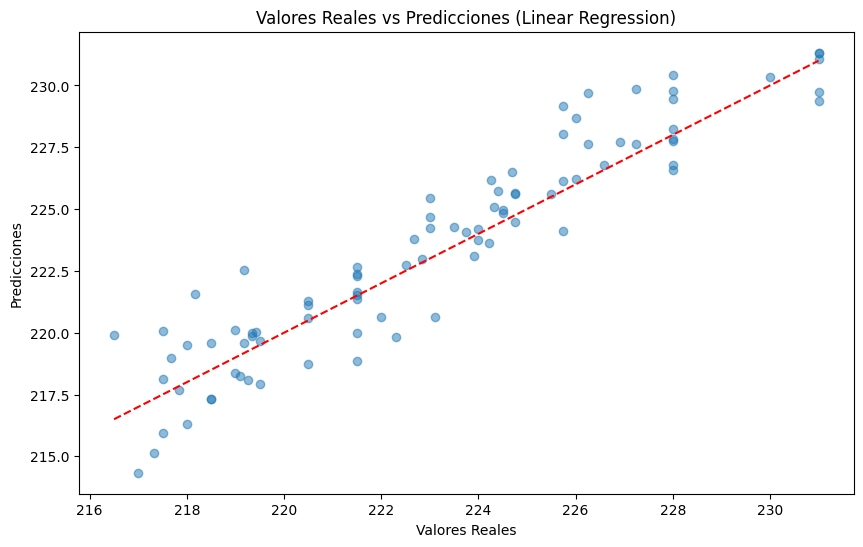

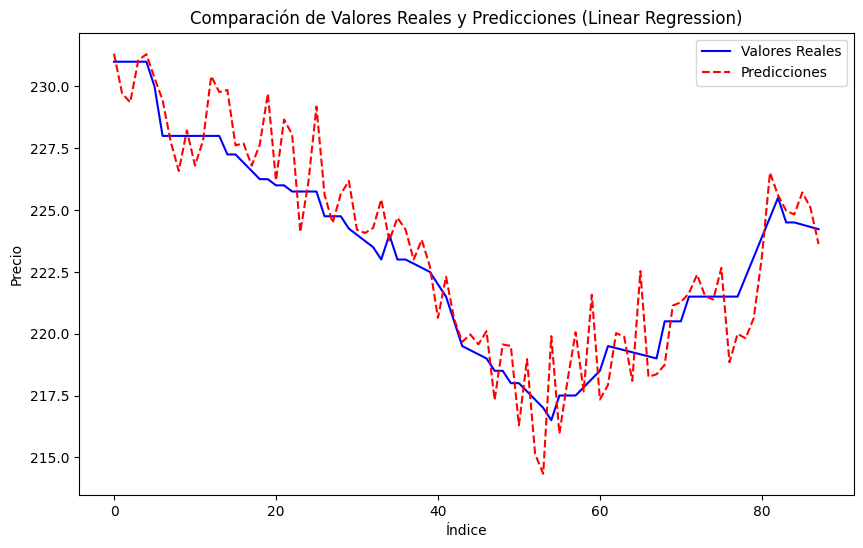

In [278]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (Linear Regression)')
plt.show()

# Gráfico de línea de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Valores Reales', color='b')
plt.plot(y_pred_lr, label='Predicciones', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación de Valores Reales y Predicciones (Linear Regression)')
plt.legend()
plt.show()


Feature ranking:
1. Feature price_lag_1 (0.4452732850929768)
2. Feature price_lag_3 (0.33401606558308533)
3. Feature price_lag_2 (0.20866628799421988)
4. Feature pressure_lag_1 (0.001238133323170466)
5. Feature temp_max_lag_3 (0.0010865772934177899)
6. Feature pressure (0.00048640194204219633)
7. Feature weather_description_broken clouds_lag_3 (0.00041889482468478536)
8. Feature feels_like_lag_3 (0.0004095339651271535)
9. Feature temp_min_lag_3 (0.00040570626100822033)
10. Feature temp_lag_3 (0.0003498331028258173)
11. Feature pressure_lag_3 (0.00034092119582295903)
12. Feature weather_main_Clouds_lag_3 (0.00023145581628593827)
13. Feature humidity (0.00022536432342895282)
14. Feature humidity_lag_3 (0.00019654858880071457)
15. Feature temp_min_lag_2 (0.00019408202174908652)
16. Feature pressure_lag_2 (0.00018426059992710696)
17. Feature wind_speed (0.0001820829109429744)
18. Feature weather_description_sky is clear_lag_3 (0.00018118009423936942)
19. Feature weather_icon_01d_lag_3 (0.0

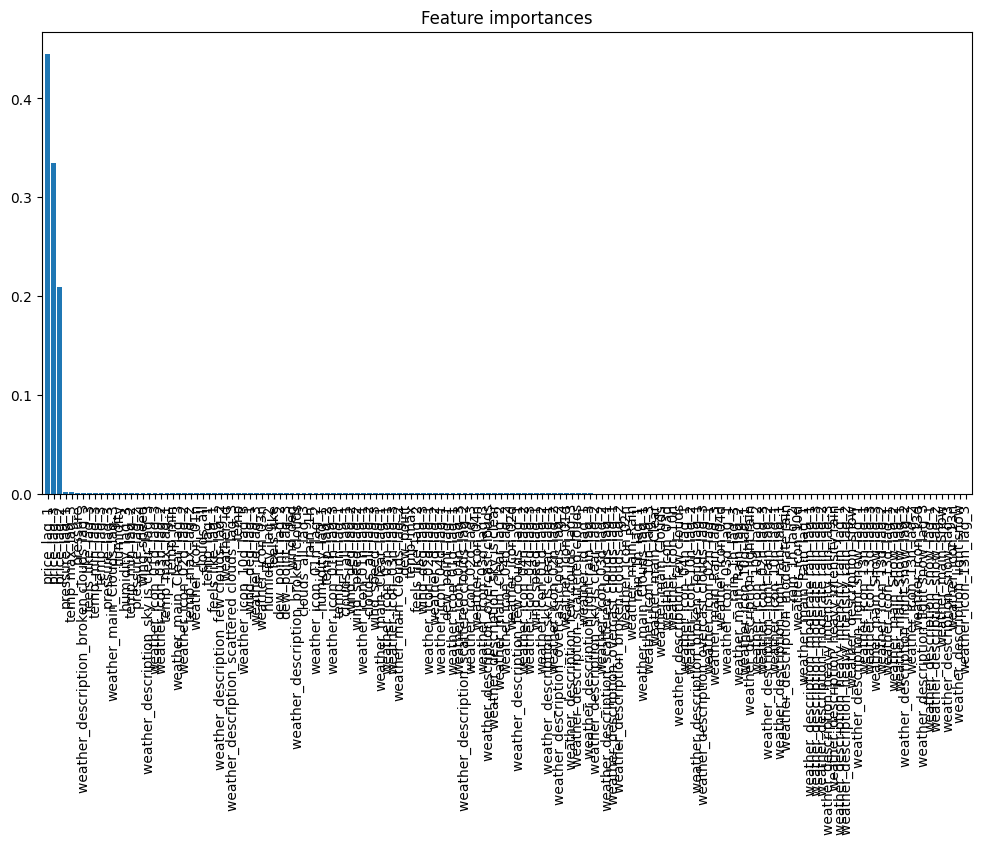

In [291]:
# Assuming you have a list of column names used for training
column_names = X_train.columns

# Feature importance
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking with column names
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {column_names[indices[f]]} ({importances[indices[f]]})")

# Optionally, visualize feature importance with column names
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [column_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


- Feature importance of the variables are represented just with the lags

Mean Squared Error: 126.65237809161296
R^2 Score: -7.409839471809004


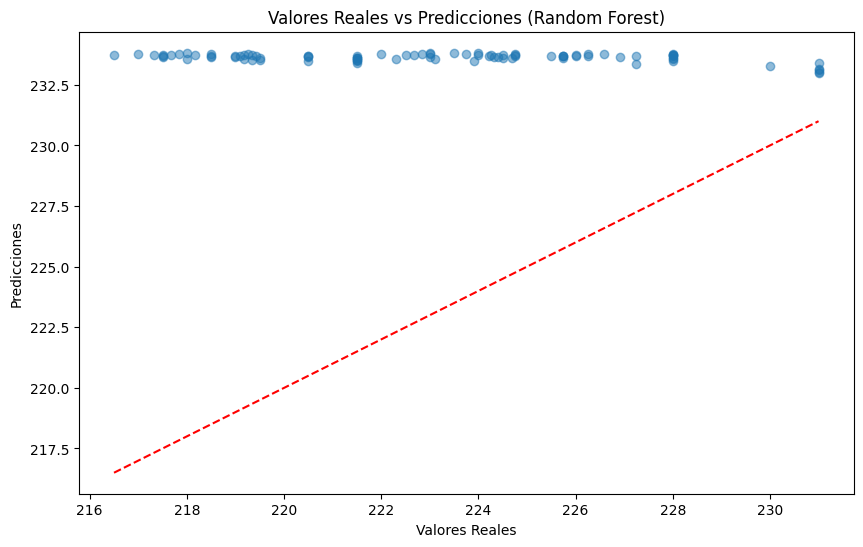

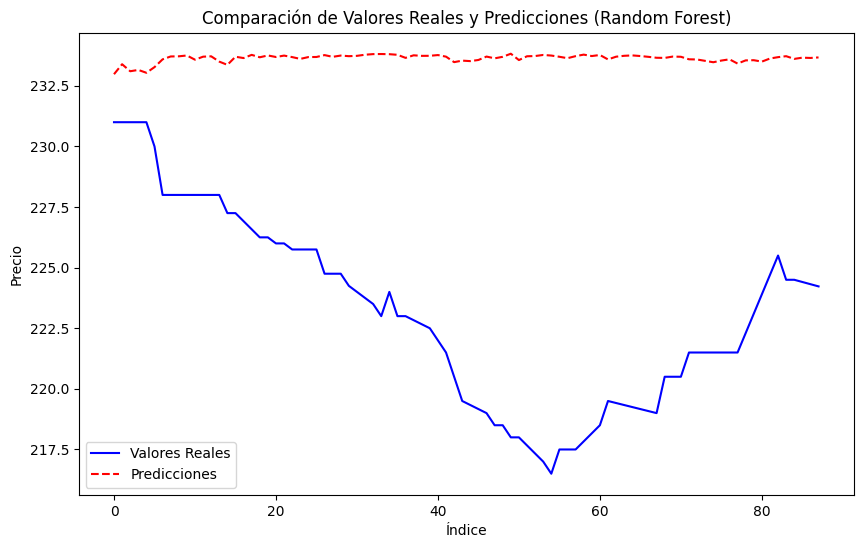

In [288]:
import matplotlib.pyplot as plt

# Inicializar el modelo
modelo = RandomForestRegressor(n_estimators=400, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (Random Forest)')
plt.show()

# Gráfico de línea de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Valores Reales', color='b')
plt.plot(y_pred, label='Predicciones', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación de Valores Reales y Predicciones (Random Forest)')
plt.legend()
plt.show()


Gradient Boosting Mean Squared Error: 123.22196895021915
Gradient Boosting R^2 Score: -7.182057012162803


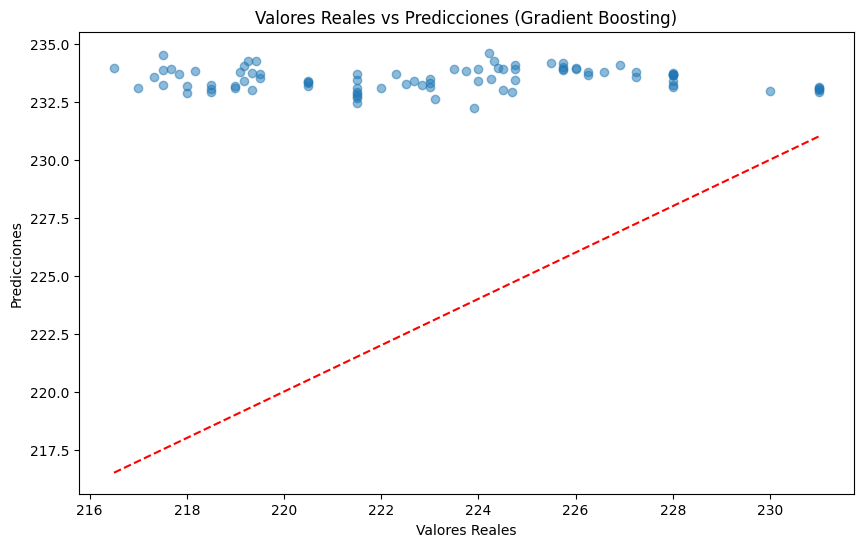

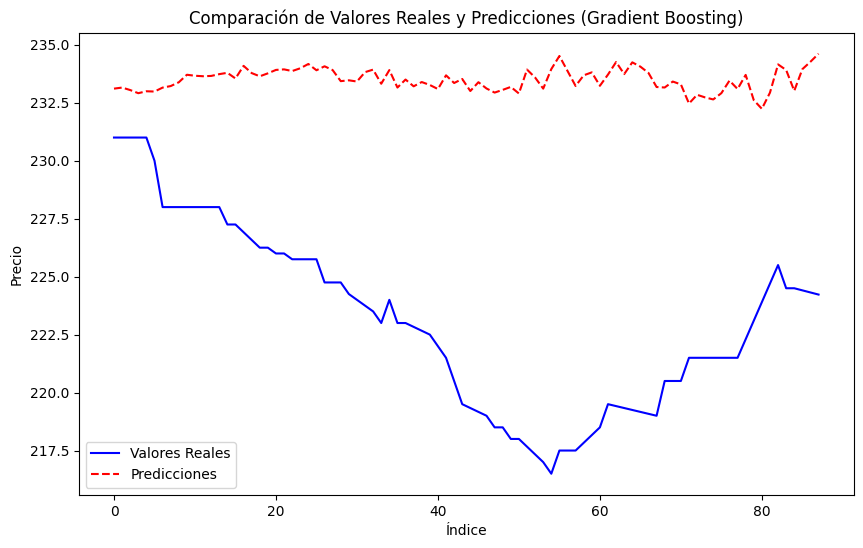

In [286]:
from sklearn.ensemble import GradientBoostingRegressor

# Inicializar el modelo
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_gb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_gb = modelo_gb.predict(X_test)

# Evaluar el modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R^2 Score: {r2_gb}')

# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (Gradient Boosting)')
plt.show()

# Gráfico de línea de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Valores Reales', color='b')
plt.plot(y_pred_gb, label='Predicciones', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación de Valores Reales y Predicciones (Gradient Boosting)')
plt.legend()
plt.show()


SVR Mean Squared Error: 818.5517700970266
SVR R^2 Score: -53.35262321645235


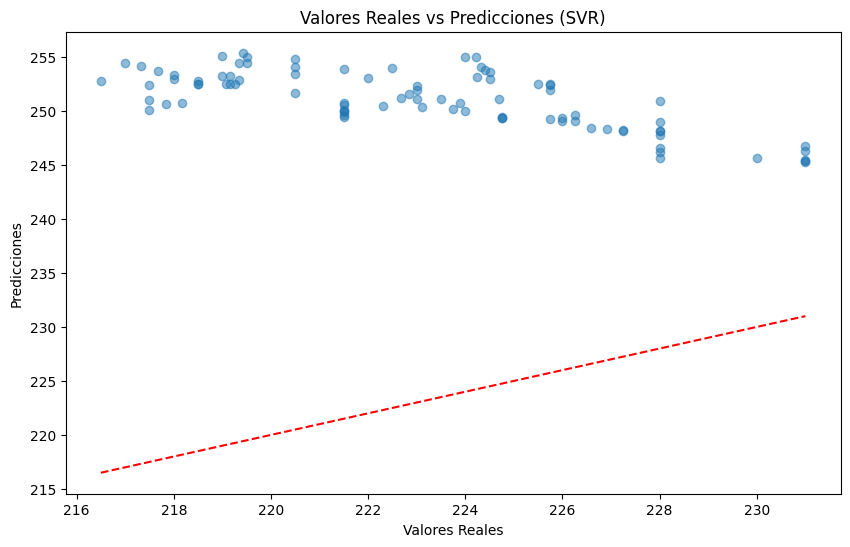

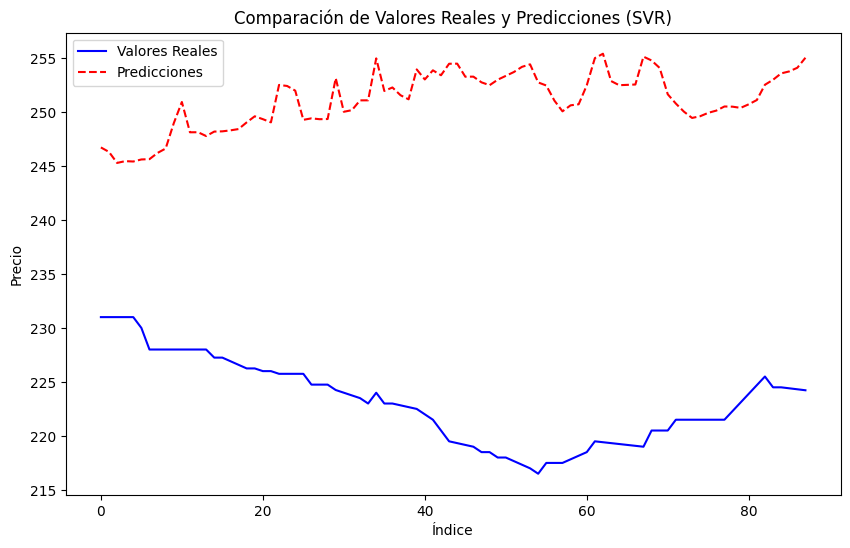

In [287]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo
modelo_svr = SVR(kernel='rbf')

# Entrenar el modelo
modelo_svr.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svr = modelo_svr.predict(X_test_scaled)

# Evaluar el modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R^2 Score: {r2_svr}')

# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (SVR)')
plt.show()

# Gráfico de línea de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Valores Reales', color='b')
plt.plot(y_pred_svr, label='Predicciones', color='r', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.title('Comparación de Valores Reales y Predicciones (SVR)')
plt.legend()
plt.show()


**Arima series?**